<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [51]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [52]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [53]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [54]:
#CRIM per capita crime rate by town
#ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS proportion of non-retail business acres per town.
#CHAS Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX nitric oxides concentration (parts per 10 million)
#RM average number of rooms per dwelling
#AGE proportion of owner-occupied units built prior to 1940
#DIS weighted distances to five Boston employment centres
#RAD index of accessibility to radial highways
#TAX full-value property-tax rate per $10,000
#PTRATIO pupil-teacher ratio by town
#B 1000(Bk 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT % lower status of the population
#MEDV Median value of owner-occupied homes in $1000'ss in $1000's

In [55]:
df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [56]:
df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [57]:
df.tail(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
496,496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,21.14,19.7
497,497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,14.10,18.3
498,498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,12.92,21.2
499,499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,15.10,17.5
500,500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [58]:
df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [59]:

df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## 1  For the "Median value of owner-occupied homes" provide a boxplot

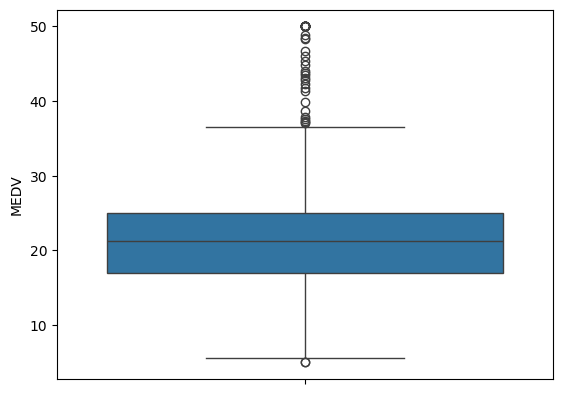

In [60]:
ax = sns.boxplot(y='MEDV', data=df)

### The box plot shows the median value of owner occupied homes is under 50,000, and most are between 10,000 and 30,000 

## 2 Provide a  bar plot for the Charles river variable

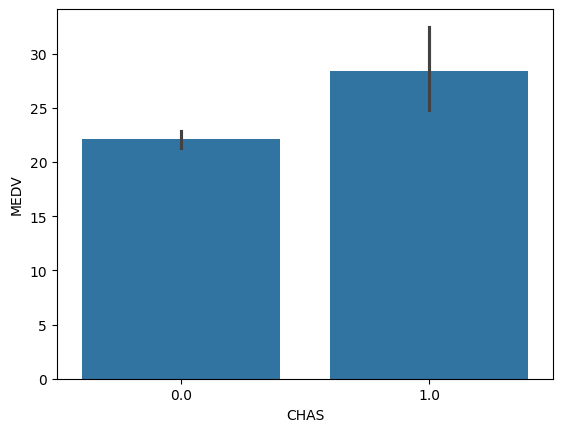

In [61]:

ax = sns.barplot(x="CHAS", y="MEDV", data=df)

### The bar chart shows that the median value of homes is higher for tracts bounding the river (CHAS=1).

## 3 Provide a boxplot for the MEDV variable vs the AGE variable. 

In [63]:

x =  0*(df['AGE']<=35) + 35*(35<df['AGE'])*(df['AGE']<70) + 70*(df['AGE']>=70)
min(x)

0

In [64]:

df['AGE'] = 0*(df['AGE']<=35) + 35*(35<df['AGE'])*(df['AGE']<70) + 70*(df['AGE']>=70)


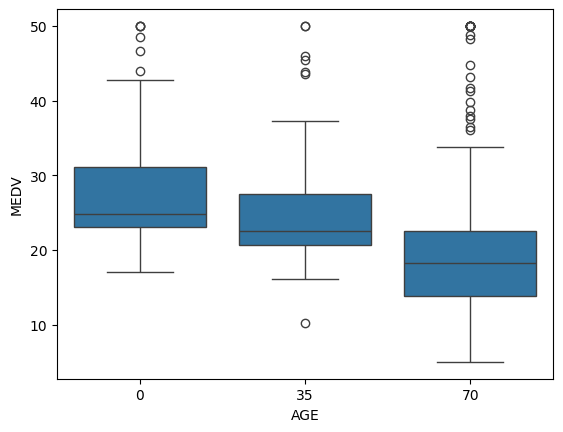

In [66]:
ax = sns.boxplot(x='AGE', y='MEDV', data=df)

### Boxplot shows that home values are highest for ages 35 and under, and lower for age 35 to 70, and lowest for age over 70

## 4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

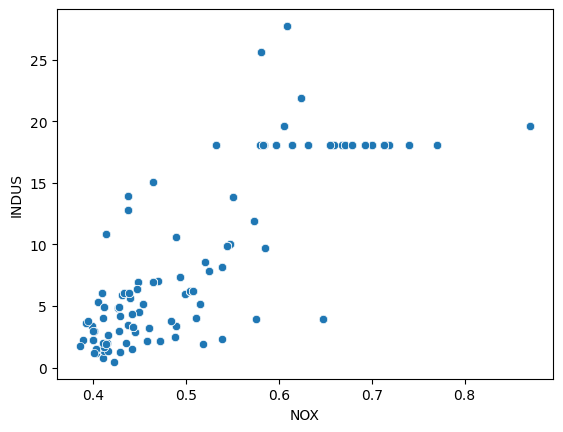

In [68]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=df)

### The sctter plot shows that there is a modest degree of posive correlation between NOX and INCUS indicating that generally speaking the higher proportion of non-retail business is associated with higher nitric oxide concentration.

## 5  Create a histogram for the pupil to teacher ratio variable

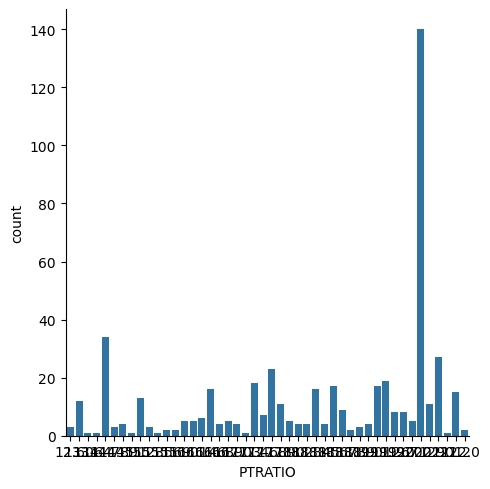

In [70]:
sns.catplot(x='PTRATIO',  kind='count', data=df)

### The histogram shows that many towns have about 20 students per teacher, but that it ranges from about 12 to about 22

# TASK 5 HYPOTHESIS TESTING

Task 5: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

### 1 Null: the average median home value MEDV does not differ depending on whether bounded by the Charles river CHAS.
### Alternative: The average of the menian home value does differ  depending on whether bounded by the Charles river
### Conclusion: Reject the Null and conclude that the average MEDV differs by CHAS bounded at the alpha=0.05 significance level 




### 2 Null: the average median home value MEDV does not differ depending on AGE group
### Alternative: The average of the menian home value does differ  depending on AGE group
### Conclusion: Reject the Null hypotheses and conclude that average MEDV is not the same across the three AGE groups

### 3 Null: There is no correlation between NOX and INDUS.
### Alternative: NOX and INDUS are correlated 
### Conclusion: Reject the Null hypotheses and conclude that NOX and INDUS are correlated

### 4 Null: Median home price MEDV is not linearly relatted to the weighted distance DIS factor.
### Alternative: MEDV depends on DIS (linearly relationship exists)
### Conclusion:
### I didn't bother to do this test, but I am guessing the result is to reject the null and conclude that increasing DIS is associated with decrease in MEDV

# TITLES AND LABELS ON ALL GRAPHS ??
# YES I DID, BUT I USED AN INVISIBLE FONT THAT CAN BE SEEN ONLY BY MAGIC
# 4 points
Learner provided appropriate labels and titles on four or all of the visualizations